In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.fft import fftn, ifftn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def df_grabber(ind):
  df = pd.read_csv(f'/content/drive/MyDrive/ResearchProject/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity.csv')
  return df

In [ ]:
df_list = []
for i in range(1, 16):
  df_list.append(df_grabber(i))
df = pd.concat(df_list, ignore_index=True)
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df

,acc_x,acc_y,acc_z,datetime,activity,magnitude
0,32.0,32.0,32.0,2024-01-01 00:00:00.000000000,0,55.425626
1,-27.0,1.0,58.0,2024-01-01 00:00:00.015624960,0,63.984373
2,-27.0,2.0,59.0,2024-01-01 00:00:00.031249920,0,64.915329
3,-27.0,1.0,59.0,2024-01-01 00:00:00.046874880,0,64.892218
4,-27.0,1.0,58.0,2024-01-01 00:00:00.062500096,0,63.984373
...,...,...,...,...,...,...
4342738,-32.0,28.0,48.0,2024-01-01 01:07:05.750000128,0,64.124878
4342739,-32.0,28.0,47.0,2024-01-01 01:07:05.765625088,0,63.379808
4342740,-33.0,27.0,47.0,2024-01-01 01:07:05.781250048,0,63.458648
4342741,-32.0,27.0,48.0,2024-01-01 01:07:05.796875008,0,63.694584


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


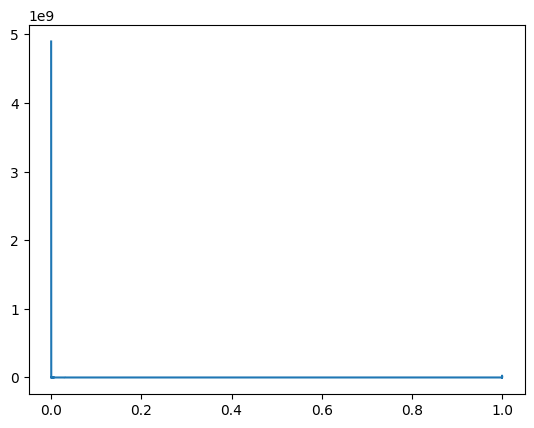

In [ ]:
n = len(df)
f_hat = np.fft.fft(df['acc_x'])
PSD = f_hat * np.conj(f_hat) / n
freq = (1/n) * np.arange(n)
plt.plot(freq, PSD)
plt.show()

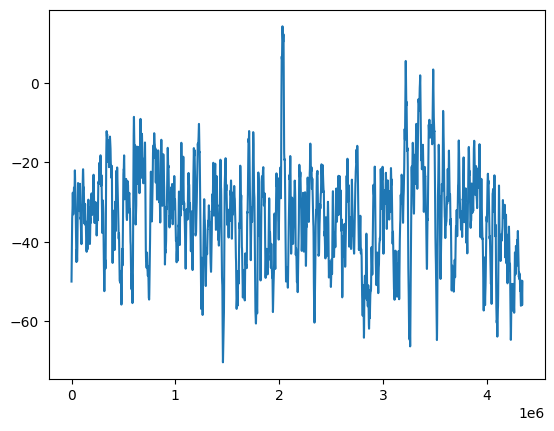

In [ ]:
min_amplitude = np.partition(PSD, -17 * 15)[-17 * 15]
indices = PSD > min_amplitude
PSD_filtered = PSD * indices
freq_filtered = freq * indices
f_hat_filtered = f_hat * indices
df['denoised_acc_x'] = np.real(ifftn(f_hat_filtered))
plt.plot(df['denoised_acc_x'])
plt.show()